<a href="https://colab.research.google.com/github/vnsh69/projects-ML-DL/blob/main/emotion_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vanshvisariya","key":"f4411a34fd7d0cca77d6612fa12f825e"}'}

In [ ]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 69 Nov  4 19:00 kaggle.json


In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!pwd

/content


In [ ]:
!kaggle datasets download -d msambare/fer2013

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
 70% 42.0M/60.3M [00:00<00:00, 155MB/s]
100% 60.3M/60.3M [00:00<00:00, 166MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("fer2013.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("train"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 7 directories and 0 images in 'train'.
There are 0 directories and 3171 images in 'train/surprise'.
There are 0 directories and 436 images in 'train/disgust'.
There are 0 directories and 4830 images in 'train/sad'.
There are 0 directories and 7215 images in 'train/happy'.
There are 0 directories and 4965 images in 'train/neutral'.
There are 0 directories and 3995 images in 'train/angry'.
There are 0 directories and 4097 images in 'train/fear'.


In [ ]:
for dirpath, dirnames, filenames in os.walk("test"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 7 directories and 0 images in 'test'.
There are 0 directories and 831 images in 'test/surprise'.
There are 0 directories and 111 images in 'test/disgust'.
There are 0 directories and 1247 images in 'test/sad'.
There are 0 directories and 1774 images in 'test/happy'.
There are 0 directories and 1233 images in 'test/neutral'.
There are 0 directories and 958 images in 'test/angry'.
There are 0 directories and 1024 images in 'test/fear'.


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def random_image(target_dir, target_class):

  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (48, 48)


array([[235, 238, 237, ..., 227, 227, 228],
       [242, 230, 238, ..., 227, 228, 228],
       [234, 240, 238, ..., 228, 228, 229],
       ...,
       [ 34,  42,  39, ...,  68, 115, 144],
       [ 34,  38,  35, ...,  52, 113, 119],
       [ 37,  37,  34, ...,  41,  70, 137]], dtype=uint8)
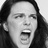

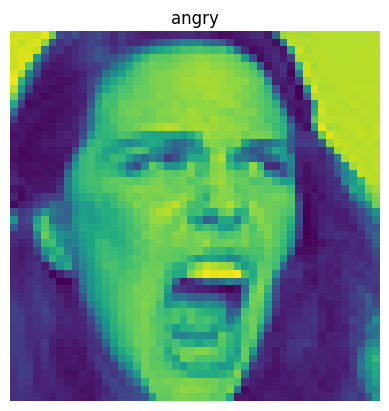

In [ ]:
random_image(target_dir="train/", target_class="angry")

Image shape: (48, 48)


array([[175, 171, 174, ..., 167, 169, 171],
       [179, 174, 176, ..., 162, 163, 169],
       [175, 176, 179, ..., 157, 159, 166],
       ...,
       [210, 209, 114, ..., 176, 183, 189],
       [230, 200, 193, ..., 180, 181, 193],
       [233, 219, 188, ..., 191, 193, 195]], dtype=uint8)
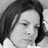

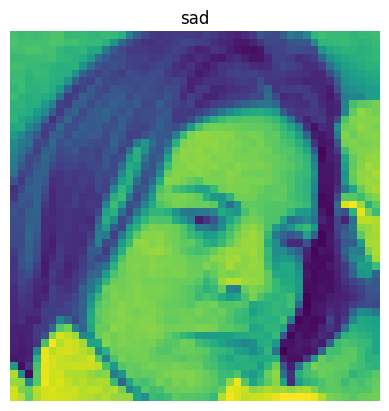

In [ ]:
random_image(target_dir="train/", target_class="angry")

In [ ]:
class_name = ['angry','disgust','fear','happy','neutral','sad','surprise']

Image shape: (48, 48)


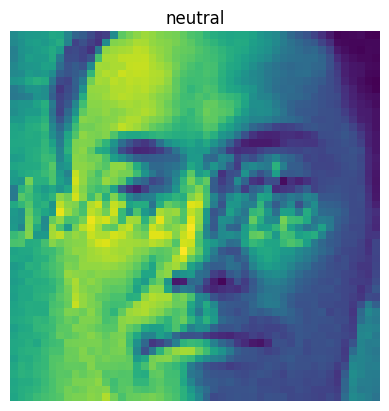

In [ ]:
img=random_image(target_dir="train/", target_class="neutral")

**note:-** the size of all the images is same , which is 48*48
also the images are in black and white

In [ ]:
print(img.shape)
import tensorflow as tf
img=tf.expand_dims(img,axis=0)
print(img.shape)

(48, 48, 1)
(1, 48, 48, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   horizontal_flip=True)
test_data = ImageDataGenerator(rescale=1./255)


In [ ]:
train_data_augmented = train_data.flow_from_directory('train/',
                                                      target_size=(48, 48),
                                                      batch_size=32,
                                                      class_mode='categorical',
                                                      shuffle=True)

test_data_augmented = test_data.flow_from_directory('test/',
                                                    target_size=(48, 48),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    shuffle=True)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
print(type(train_data_augmented))

<class 'keras.src.preprocessing.image.DirectoryIterator'>


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential

In [ ]:
model_complex = Sequential([
  Conv2D(128, 3, activation='relu', input_shape=(48, 48)),
  MaxPool2D(),
  Conv2D(64, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(16, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(7, activation='softmax')
])

model_complex.summary()

ValueError: Input 0 of layer "conv2d" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 48, 48)

In [ ]:

# Compile the model
model_complex.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])

# Fit the model
history_2 = model_complex.fit(train_data_augmented, # now the augmented data is shuffled
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data_augmented,
                        validation_steps=len(test_data_augmented))

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Load the ResNet50 base model
base_model = ResNet50(input_shape=(48, 48, 3), include_top=False)

# Freeze layers (as you had before)
for layer in base_model.layers[:-4]:
    layer.trainable = False

# Add a classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Average pool the feature map
x = Dense(7, activation='softmax')(x)  # Assuming you have 7 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data_augmented, validation_data=test_data_augmented, epochs=6, verbose=1)

Epoch 1/6
898/898 [==============================] - 98s 106ms/step - loss: 1.7831 - accuracy: 0.2672 - val_loss: 1.8526 - val_accuracy: 0.2871
Epoch 2/6
898/898 [==============================] - 95s 106ms/step - loss: 1.7395 - accuracy: 0.2909 - val_loss: 1.7474 - val_accuracy: 0.2987
Epoch 3/6
898/898 [==============================] - 94s 105ms/step - loss: 1.7185 - accuracy: 0.3041 - val_loss: 1.7152 - val_accuracy: 0.3149
Epoch 4/6
898/898 [==============================] - 94s 105ms/step - loss: 1.7065 - accuracy: 0.3134 - val_loss: 1.6786 - val_accuracy: 0.3374
Epoch 5/6
898/898 [==============================] - 95s 106ms/step - loss: 1.6986 - accuracy: 0.3192 - val_loss: 1.8752 - val_accuracy: 0.2346
Epoch 6/6
898/898 [==============================] - 94s 104ms/step - loss: 1.6890 - accuracy: 0.3217 - val_loss: 1.8169 - val_accuracy: 0.2545


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 54, 54, 3)            0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 24, 24, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 24, 24, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                          